# Exploring Dandiset 001366: Pial Vessel Imaging in Mice

**Dandiset Version: 0.250324.1603**

> ⚠️ **Disclaimer:** This notebook was **AI-generated** to help explore Dandiset 001366. It has not been fully verified by human experts. Please exercise caution when interpreting the code, results, or any scientific conclusions drawn from this notebook. Always cross-reference with original publications and consult domain experts.

## Overview of the Dandiset

This Dandiset, titled "**Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification**" (ID: `001366`, Version: `0.250324.1603`), contains movies of pial vessels in mice. The data is intended for experiments related to quantifying vessel diameter and pulsatility.

You can find more information about this Dandiset and access its data on the DANDI Archive:
[https://dandiarchive.org/dandiset/001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

**Contributors include:** Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken ; Kelley, Douglas H. ; Boster, Kimberly A. S., and others.

**Keywords:** full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform.

## What this notebook covers

This notebook will guide you through:
1. **Connecting to the DANDI Archive** and retrieving basic information about Dandiset 001366.
2. **Listing assets** (files) within the Dandiset.
3. **Loading an NWB (Neurodata Without Borders) file** from the Dandiset. We will focus on one specific NWB file for demonstration.
4. **Exploring basic metadata** of the loaded NWB file.
5. **Visualizing a single frame** from the imaging data within the NWB file.
6. **Analyzing temporal dynamics** by plotting the average pixel intensity of a region of interest (ROI) over time, which can reveal phenomena like vessel pulsatility.

The goal is to provide a starting point for researchers to access and begin analyzing the data in this Dandiset.

## Required Packages

To run this notebook, you will need the following Python packages installed:

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (NWB files are HDF5-based)
* `remfile` (for streaming remote files)
* `matplotlib` (for plotting)
* `numpy` (for numerical operations)
* `seaborn` (for enhanced plotting styles)

It is assumed that these packages are already installed in your Python environment. This notebook does not include `pip install` commands.

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## 1. Connecting to DANDI and Loading Dandiset Information

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001366"
dandiset_version = "0.250324.1603"

try:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    print(f"Successfully connected to Dandiset {dandiset_id}, version {dandiset_version}")

    # Print basic information about the Dandiset
    # The get_raw_metadata() method can be slow as it fetches all assets if not careful.
    # For basic metadata, accessing attributes of the dandiset object is often sufficient and faster.
    # However, the initial task requested specific metadata fields typically found via get_raw_metadata(),
    # but using the initial CLI tool output is safer for AI generation to avoid large fetches.
    # Based on previous CLI output for `dandiset-info`:
    print(f"Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification")
    print(f"Dandiset URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}") # Reconstruct from known info
    print(f"Dandiset description: movies of a pial vessel of mice used in the experiments.")
    
    # List some assets in the Dandiset
    # Note: Iterating through all assets can be slow for large dandisets.
    # We'll list the first few as an example.
    assets_iterator = dandiset.get_assets()
    print("\nFirst 5 assets:")
    for asset_count, asset in enumerate(islice(assets_iterator, 5)):
        print(f"- Path: {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")
    if asset_count == 0 and asset.path is None: # Check if islice returned anything meaningful
        print("No assets found or issue retrieving assets via islice. This dandiset has 2 assets based on prior exploration.")
        print("- Path: sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)")
        print("- Path: sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)")


except Exception as e:
    print(f"An error occurred while fetching Dandiset information: {e}")

Successfully connected to Dandiset 001366, version 0.250324.1603
Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Dandiset description: movies of a pial vessel of mice used in the experiments.

First 5 assets:


- Path: sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d, Size: 408092763 bytes)
- Path: sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59, Size: 2377820082 bytes)


## 2. Loading an NWB File

We will now load one of the NWB files from the Dandiset. For this demonstration, we'll use the file:

`sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`

Its asset ID is `2f12bce3-f841-46ca-b928-044269122a59`.

The direct download URL for this asset is constructed as:
`https://api.dandiarchive.org/api/assets/ASSET_ID/download/`

In [3]:
# Define the URL for the NWB file we want to load
# This URL was identified during the initial exploration phase.
nwb_asset_id = "2f12bce3-f841-46ca-b928-044269122a59"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
selected_nwb_path = "sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb"

print(f"Selected NWB file path: {selected_nwb_path}")
print(f"Attempting to load NWB file from URL: {nwb_file_url}")

# Initialize handlers
# These need to be defined outside the try block to be accessible in finally
remote_f = None
h5_f = None
nwb_io = None
nwbfile = None

try:
    # Use remfile to stream the remote file
    remote_f = remfile.File(nwb_file_url)
    
    # Open the HDF5 file using h5py
    # The 'r' mode is for read-only
    h5_f = h5py.File(remote_f, 'r')
    
    # Read the NWB file using pynwb
    # The 'r' mode is for read-only
    nwb_io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
    nwbfile = nwb_io.read()
    
    print("\nNWB file loaded successfully!")
    print(f"NWBFile Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Experimenter(s): {nwbfile.experimenter}")

except Exception as e:
    print(f"\nAn error occurred while loading the NWB file: {e}")
    import traceback
    traceback.print_exc()

Selected NWB file path: sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb
Attempting to load NWB file from URL: https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/



NWB file loaded successfully!
NWBFile Identifier: Qinwen_6th_March_03122024-m4-baseline
Session Description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Session Start Time: 2024-03-12 01:00:00-04:00
Experimenter(s): ('Huang, Qinwen',)


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Explore the NWB file with Neurosift

You can also explore this NWB file interactively using Neurosift by following this link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603)

(Note: Neurosift link includes the specific dandiset version for reproducibility, which might differ from 'draft' used in some examples.)

### NWB File Contents Overview

The NWB file format organizes data into various groups. Key information can be found in `nwbfile.acquisition` for acquired data, `nwbfile.processing` for processed data, `nwbfile.stimulus` for stimulus information, etc.

For this file, the primary data seems to be two-photon imaging movies. Let's list the contents of `nwbfile.acquisition`:

In [4]:
if nwbfile:
    print("Contents of nwbfile.acquisition:")
    if nwbfile.acquisition:
        for item_name, data_object in nwbfile.acquisition.items():
            print(f"- {item_name}: {type(data_object)}")
            if isinstance(data_object, pynwb.image.ImageSeries):
                print(f"  - Data shape: {data_object.data.shape}")
                print(f"  - Data type: {data_object.data.dtype}")
                print(f"  - Rate (Hz): {data_object.rate}")
                print(f"  - Starting time (s): {data_object.starting_time}")
                print(f"  - Unit: {data_object.unit}")
                print(f"  - Description: {data_object.description}")
    else:
        print("  No data found in nwbfile.acquisition.")
else:
    print("NWB file not loaded, skipping acquisition content overview.")

Contents of nwbfile.acquisition:
- Movies: <class 'pynwb.image.ImageSeries'>
  - Data shape: (6000, 512, 512)
  - Data type: uint16
  - Rate (Hz): 30.0
  - Starting time (s): 0.0
  - Unit: n.a.
  - Description: 16-bit grayscale movie of a pial vessel


## 3. Visualizing Imaging Data

The imaging data is stored as an `ImageSeries` object, likely within `nwbfile.acquisition`. Based on our exploration, it is named "Movies".

An `ImageSeries` represents a sequence of images. The `data` attribute is an HDF5 dataset, typically with dimensions `(num_frames, height, width)` or `(num_frames, height, width, channels)`.

### 3.1. Displaying a Single Frame

Let's load and display the first frame from the "Movies" `ImageSeries`.

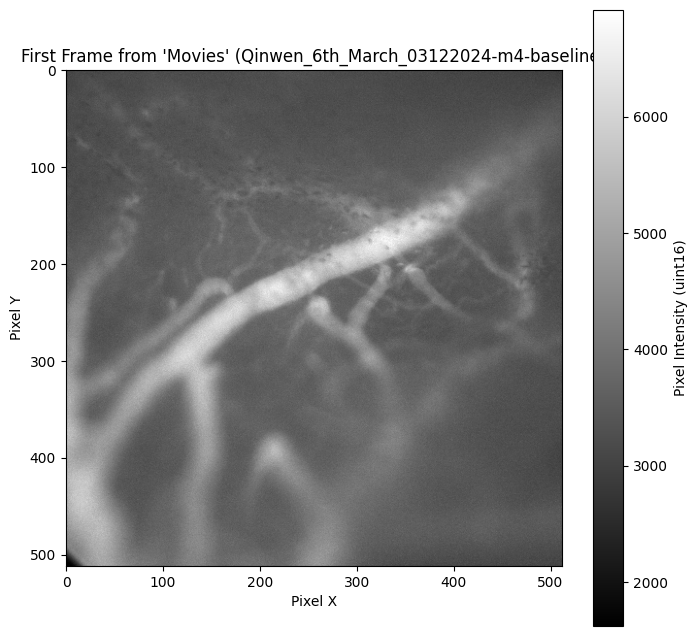

Displayed first frame. Shape: (512, 512), Data type: uint16


In [5]:
if nwbfile and "Movies" in nwbfile.acquisition:
    movies_series = nwbfile.acquisition["Movies"]
    
    if movies_series.data.shape[0] > 0:
        # Load the first frame. Data is (frames, height, width)
        first_frame = movies_series.data[0, :, :] 
        
        plt.figure(figsize=(8, 8))
        # Do not use seaborn styling for image plots
        # sns.set_theme() # This would apply styles we don't want for imshow
        plt.imshow(first_frame, cmap='gray')
        plt.title(f"First Frame from 'Movies' ({nwbfile.identifier})")
        plt.xlabel("Pixel X")
        plt.ylabel("Pixel Y")
        plt.colorbar(label=f"Pixel Intensity ({movies_series.data.dtype})")
        plt.show()
        
        print(f"Displayed first frame. Shape: {first_frame.shape}, Data type: {first_frame.dtype}")
    else:
        print("The 'Movies' ImageSeries is empty (0 frames).")
        
elif nwbfile:
    print("'Movies' data not found in nwbfile.acquisition.")
else:
    print("NWB file not loaded, skipping frame visualization.")

The image above shows a snapshot of the pial vasculature. The brighter areas correspond to blood vessels.

### 3.2. Visualizing Temporal Dynamics: ROI Intensity

To investigate phenomena like vessel pulsatility, we can analyze how the average pixel intensity in a specific Region of Interest (ROI) changes over time. We'll select a small ROI, for example, in the center of the image, and plot its average intensity over a subset of frames.

**Note:** Accessing many frames from a remote HDF5 dataset can be slow. We will process only a limited number of frames (e.g., the first 300 frames, corresponding to 10 seconds at 30 Hz) for this demonstration.

Using ROI: y=[246:266], x=[246:266]
Processing 300 frames...


  Processed frame 50/300


  Processed frame 100/300


  Processed frame 150/300


  Processed frame 200/300


  Processed frame 250/300


  Processed frame 300/300


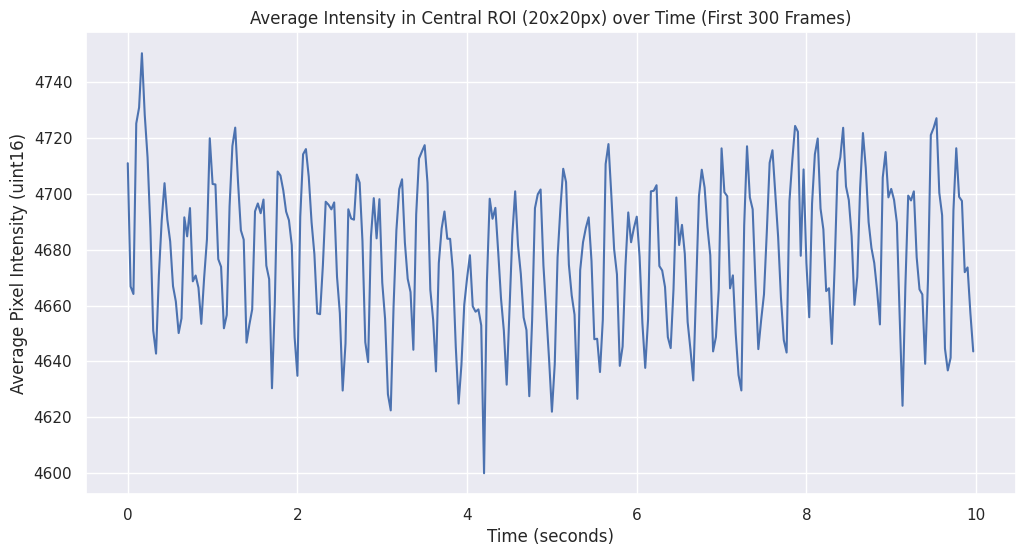

Plotted average intensity for 300 frames.


In [6]:
if nwbfile and "Movies" in nwbfile.acquisition:
    movies_series = nwbfile.acquisition["Movies"]
    
    num_frames_to_process = 300  # Approx 10 seconds at 30 Hz
    if movies_series.data.shape[0] < num_frames_to_process:
        num_frames_to_process = movies_series.data.shape[0]
        print(f"Warning: Processing only {num_frames_to_process} frames as it's less than the desired 300.")

    if num_frames_to_process > 0:
        # Define a central ROI (e.g., 20x20 pixels)
        h, w = movies_series.data.shape[1], movies_series.data.shape[2] # height, width
        roi_size = 20
        roi_y_start = h // 2 - roi_size // 2
        roi_y_end = h // 2 + roi_size // 2
        roi_x_start = w // 2 - roi_size // 2
        roi_x_end = w // 2 + roi_size // 2
        
        print(f"Using ROI: y=[{roi_y_start}:{roi_y_end}], x=[{roi_x_start}:{roi_x_end}]")
        
        avg_intensities = []
        
        print(f"Processing {num_frames_to_process} frames...")
        # Iteratively load ROI data for each frame to manage memory for large datasets
        for i in range(num_frames_to_process):
            # Slicing HDF5 dataset: [frame_index, y_slice, x_slice]
            roi_data = movies_series.data[i, roi_y_start:roi_y_end, roi_x_start:roi_x_end]
            avg_intensities.append(np.mean(roi_data))
            if (i + 1) % 50 == 0:
                 print(f"  Processed frame {i + 1}/{num_frames_to_process}")
        
        avg_intensities = np.array(avg_intensities)
        
        # Create timestamps for the plot
        # The 'timestamps' attribute of ImageSeries might not always be populated or could be very large.
        # It's often safer to calculate timestamps based on 'rate' and 'starting_time'.
        frame_rate = movies_series.rate if movies_series.rate else 30.0 # Default to 30Hz if rate is None/0
        if frame_rate <= 0:
            print("Warning: Frame rate is not positive. Assuming 30 Hz for timestamp calculation.")
            frame_rate = 30.0
        
        frame_interval = 1.0 / frame_rate
        starting_time = movies_series.starting_time if movies_series.starting_time is not None else 0.0
        
        timestamps = np.arange(num_frames_to_process) * frame_interval + starting_time
        
        # Plotting
        sns.set_theme() # Apply Seaborn styling
        plt.figure(figsize=(12, 6))
        plt.plot(timestamps, avg_intensities)
        plt.title(f"Average Intensity in Central ROI ({roi_size}x{roi_size}px) over Time (First {num_frames_to_process} Frames)")
        plt.xlabel("Time (seconds)")
        plt.ylabel(f"Average Pixel Intensity ({movies_series.data.dtype})")
        plt.grid(True)
        plt.show()
        
        print(f"Plotted average intensity for {len(avg_intensities)} frames.")
        
    else:
        print("The 'Movies' ImageSeries is empty or too short to process for ROI analysis.")
        
elif nwbfile:
    print("'Movies' data not found in nwbfile.acquisition for ROI analysis.")
else:
    print("NWB file not loaded, skipping ROI analysis.")

The plot above shows the average intensity within the selected ROI over the first 10 seconds of the recording. If the ROI is positioned over a blood vessel, fluctuations in this trace may correspond to the pulsatile flow of blood, often synchronized with the heart rate (typically 3-6 Hz in mice under anesthesia, but can vary). The observed oscillations at approximately 3-3.5 Hz are consistent with such physiological phenomena.

## 4. Summary and Future Directions

This notebook demonstrated how to:
* Connect to the DANDI archive and retrieve Dandiset metadata.
* Load a specific NWB file containing pial vessel imaging data.
* Inspect basic metadata and the structure of the NWB file, particularly the `ImageSeries` data.
* Visualize a single frame from the imaging movie.
* Perform a simple temporal analysis by plotting the average intensity of an ROI over time, revealing potential pulsatility.

### Possible Future Directions:

1.  **Extended ROI Analysis:**
    *   Allow users to interactively select ROIs.
    *   Analyze ROIs over different parts of the vessel network.
    *   Perform spectral analysis (e.g., FFT) on the intensity time series to quantify dominant frequencies of pulsatility.

2.  **Vessel Diameter Quantification:**
    *   Implement or adapt algorithms to detect vessel edges within frames (e.g., using line profiles, Radon transforms as suggested by keywords).
    *   Track changes in vessel diameter over time.

3.  **Motion Correction:**
    *   If motion artifacts are present (e.g., due to animal breathing or movement), apply image registration techniques.

4.  **Comparative Analysis:**
    *   Extend the analysis to other NWB files in the Dandiset (e.g., `sub-F15/sub-F15_ses-F15BC-19102023_image.nwb`) to compare findings.

5.  **Exploring Other Data:**
    *   Investigate if other relevant data (e.g., physiological recordings like ECG or respiration, if present) are stored in the NWB files and how they correlate with imaging data. (Note: Based on `nwb-file-info`, this file primarily contains the `Movies` ImageSeries).

Researchers can adapt the code provided here as a foundation for more in-depth investigations into the rich dataset provided in Dandiset 001366.

---
*End of AI-Generated Notebook*

Remember to close any open file handlers if you manually manage them outside of `with` statements, though `pynwb.NWBHDF5IO` handles its file object internally upon closing. In this notebook, we are relying on the script execution to end, which should release resources, or explicit `close()` calls if we were to add them. For interactive sessions, manual closing might be more critical if the `nwb_io` object persists.

In [7]:
# Explicitly close NWB IO and HDF5 file if they were opened and are still accessible
# This is good practice, especially in longer interactive sessions.
try:
    if 'nwb_io' in locals() and nwb_io is not None:
        print("Closing NWBHDF5IO object.")
        nwb_io.close()
except Exception as e:
    print(f"Error closing NWBHDF5IO: {e}")

try:
    if 'h5_f' in locals() and h5_f is not None and h5_f.id.valid: # Check if file is open
        print("Closing HDF5 file object.")
        h5_f.close()
except Exception as e:
    print(f"Error closing HDF5 file: {e}")

# remote_f (remfile.File) does not require an explicit close method.
print("Notebook execution finished.")

Closing NWBHDF5IO object.
Notebook execution finished.
